[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rbg-research/AI-Training/blob/main/voice-analytics/speech-analytics-deep-learning/session-1/Tutorial-1.ipynb)

# Data Preparation

* The TIMIT corpus of read speech is designed to provide speech data for acoustic-phonetic studies and for the development and evaluation of automatic speech recognition systems.
* TIMIT contains broadband recordings of 630 speakers of eight major dialects of American English, each reading ten phonetically rich sentences.
* The TIMIT corpus includes time-aligned orthographic, phonetic and word transcriptions as well as a 16-bit, 16kHz speech waveform file for each utterance.

In [1]:
from datasets import load_dataset

* Datasets is a library for easily accessing and sharing datasets, and evaluation metrics for Natural Language Processing (NLP), computer vision, and audio tasks.
* For more details refer these [link1](https://huggingface.co/docs/datasets/index.html) and [link2](https://huggingface.co/datasets/viewer/)

In [2]:
dataset = load_dataset(
   'timit_asr')

Reusing dataset timit_asr (/home/ubuntu/.cache/huggingface/datasets/timit_asr/clean/2.0.1/bce749dca50ede2d9692e53bf7eede501996e25b8aa318280ec9041a9f4c3057)


  0%|          | 0/2 [00:00<?, ?it/s]

* "load_dataset" will download the corpus or will load the corpus if it is already downloaded

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['file', 'text', 'phonetic_detail', 'word_detail', 'dialect_region', 'sentence_type', 'speaker_id', 'id'],
        num_rows: 4620
    })
    test: Dataset({
        features: ['file', 'text', 'phonetic_detail', 'word_detail', 'dialect_region', 'sentence_type', 'speaker_id', 'id'],
        num_rows: 1680
    })
})

In [4]:
train_files, train_labels = dataset["train"]["file"], dataset["train"]["speaker_id"]

In [5]:
train_labels

['MMDM0',
 'MMDM0',
 'MMDM0',
 'MMDM0',
 'MMDM0',
 'MMDM0',
 'MMDM0',
 'MMDM0',
 'MMDM0',
 'MMDM0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCSS0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MCDR0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'MLEL0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'FEEH0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MFWK0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MKAM0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MSMS0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'MGJC0',
 'FLKM0',
 'FLKM0',
 'FLKM0',
 'FLKM0',
 'FLKM0',
 'FLKM0',
 'FLKM0',
 'FLKM0',
 'FLKM0',
 'FLKM0',


In [6]:
test_files, test_labels = dataset["test"]["file"], dataset["test"]["speaker_id"]

# Common Features, Visualiztion & Information

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import sklearn

* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
* For more details refer this [link](https://matplotlib.org/stable/tutorials/index.html)
* librosa is a python package for music and audio analysis.
* For more details refer this [link](https://librosa.org/doc/latest/tutorial.html)
* Sklearn mostly used for performing feature preprocessing and conventional machine learning
* For more details refer this [link](https://scikit-learn.org/stable/)

In [8]:
demo_file = train_files[100]

In [9]:
demo_file

'/home/ubuntu/.cache/huggingface/datasets/downloads/extracted/75045eb679e4518fc6a8f0aee618f5740e046ecca85c45da5bf6a16075214e8a/data/TRAIN/DR4/MMGC0/SX315.WAV'

### load an audio file

In [10]:
x , sr = librosa.load(demo_file)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [11]:
x

array([-8.1144331e-05,  7.8152596e-05,  7.8658697e-05, ...,
        3.7118461e-05,  3.1213473e-05,  0.0000000e+00], dtype=float32)

In [12]:
sr

22050

### load an audio file with specific sampling rate

In [13]:
x , sr = librosa.load(demo_file, sr=16000)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [14]:
x

array([-9.1552734e-05,  1.2207031e-04, -3.0517578e-05, ...,
        0.0000000e+00,  3.0517578e-05,  3.0517578e-05], dtype=float32)

In [15]:
sr

16000

### getting the duration

In [16]:
librosa.get_duration(y=x, sr=sr)

2.89925

### playing audio

In [17]:
ipd.Audio(x, rate=sr)

### wavplot - loudness of the audio at a given time (time domain)

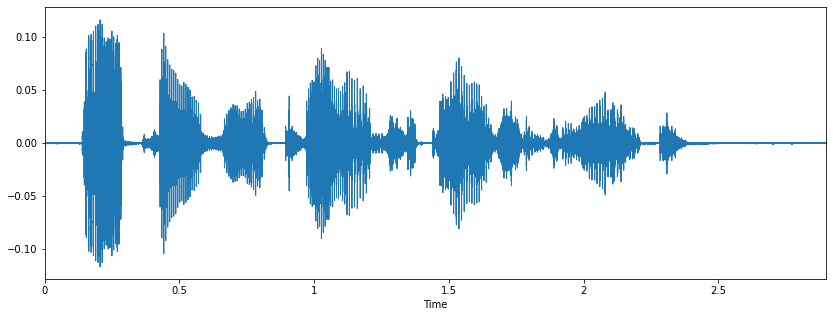

In [18]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### spectogram - frequencies playing at a particular time along with it’s amplitude

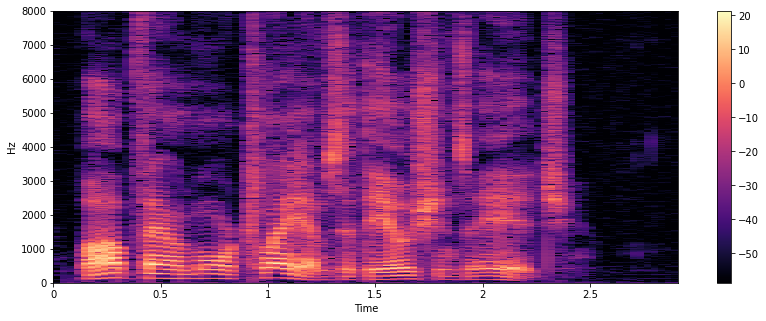

In [19]:
X = librosa.stft(x) # converts data into short term Fourier transform
# (amplitude of various frequencies playing at a given time of an audio signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

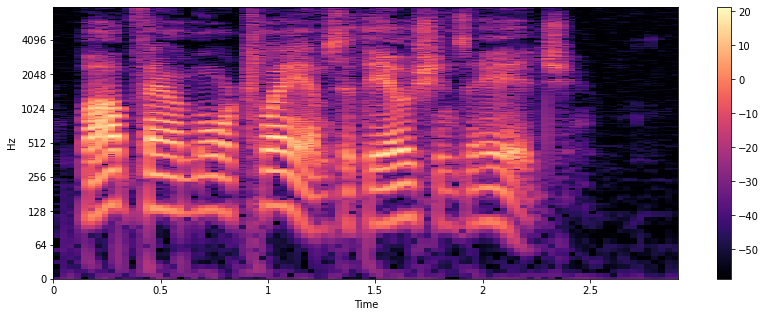

In [20]:
X = librosa.stft(x) # converts data into short term Fourier transform
# (amplitude of various frequencies playing at a given time of an audio signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') #log of frequencies  
plt.colorbar()

### zero Crossing Rate - rate of sign-changes along a signal

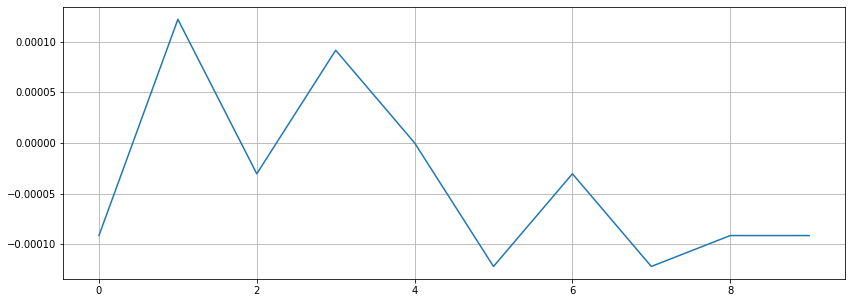

In [21]:
n0 = 0
n1 = 10
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [22]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

4


### spectral centroid - weighted mean of the frequencies present in the sound

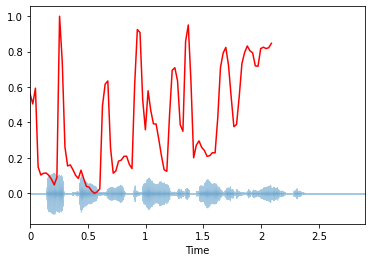

In [23]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames) # computing the time variable for visualization

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis) # normalising the spectral centroid for visualisation

librosa.display.waveplot(x, sr=sr, alpha=0.4) #plotting the Spectral Centroid along the waveform
plt.plot(t, normalize(spectral_centroids), color='r')

### spectral rolloff - frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

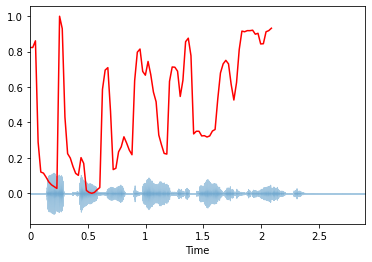

In [24]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### MFCC — Mel-Frequency Cepstral Coefficients

In [25]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 91)


In [26]:
mfccs = librosa.feature.mfcc(x, sr=sr, n_mfcc=13)
print(mfccs.shape)

(13, 91)


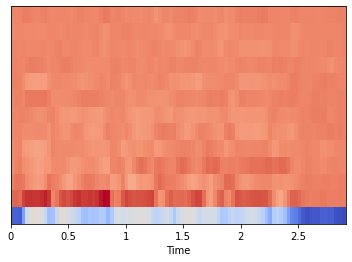

In [27]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')